In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import validation_curve

import joblib

In [ ]:
dataO = pd.read_csv('WESAD_Undersample.csv')

In [ ]:
dataO

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,-52.0,-17.0,33.0,23.01,2.453717,34.43,0.0
1,-33.0,-7.0,-56.0,-23.26,0.119230,33.07,0.0
2,48.0,1.0,40.0,-27.86,0.364765,33.97,0.0
3,35.0,-6.0,-91.0,-169.69,0.715368,32.75,0.0
4,27.0,26.0,51.0,-34.39,0.258675,33.27,0.0
...,...,...,...,...,...,...,...
111613,28.0,-28.0,48.0,39.69,3.237830,34.97,1.0
111614,33.0,-29.0,44.0,35.36,3.245506,34.97,1.0
111615,32.0,-31.0,44.0,87.65,3.228875,34.97,1.0
111616,31.0,-28.0,45.0,-59.77,3.228875,34.97,1.0


In [ ]:
dataO.drop("ACC_0", axis=1, inplace=True)

In [ ]:
dataO.drop("ACC_1", axis=1, inplace=True)

In [ ]:
dataO.drop("ACC_2", axis=1, inplace=True)

In [ ]:
dataO.drop("BVP", axis=1, inplace=True)

In [ ]:
dataO.drop("TEMP", axis=1, inplace=True)

In [ ]:
#dataO.drop("EDA", axis=1, inplace=True)

In [ ]:
dataO

,EDA,labels
0,2.453717,0.0
1,0.119230,0.0
2,0.364765,0.0
3,0.715368,0.0
4,0.258675,0.0
...,...,...
111613,3.237830,1.0
111614,3.245506,1.0
111615,3.228875,1.0
111616,3.228875,1.0


In [ ]:
dataO.describe()

,EDA,labels
count,111618.000000,111618.000000
mean,1.848955,0.500000
std,2.275945,0.500002
min,0.074584,0.000000
25%,0.365424,0.000000
50%,0.904712,0.500000
75%,2.789867,1.000000
max,15.907402,1.000000


In [ ]:
dataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111618 entries, 0 to 111617
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EDA     111618 non-null  float64
 1   labels  111618 non-null  float64
dtypes: float64(2)
memory usage: 1.7 MB


NORMALIZE

In [ ]:
X = dataO.drop(columns=['labels'])
y = dataO['labels']

In [ ]:
def normalize_data(X):
    return (X - np.mean(X)) / np.std(X)

def denormalize_data(normalized_data, original_data):
    return normalized_data * np.std(original_data) + np.mean(original_data)

X = normalize_data(X)

In [ ]:
denormalized_data = denormalize_data(X, dataO.drop(columns=['labels']))

In [ ]:
X

,EDA
0,0.265720
1,-0.760006
2,-0.652123
3,-0.498075
4,-0.698737
...,...
111613,0.610244
111614,0.613617
111615,0.606309
111616,0.606309


In [ ]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
111613    1.0
111614    1.0
111615    1.0
111616    1.0
111617    1.0
Name: labels, Length: 111618, dtype: float64

In [ ]:
y.value_counts()

labels
0.0    55809
1.0    55809
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

EVALVACIA

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'SGD': SGDClassifier(),
    'NB': GaussianNB(),
    'GBT': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'ANN': MLPClassifier()
}

#evalvácia
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

best_model = max(results, key=results.get)
print(f'Best Model: {best_model}')

Logistic Regression Accuracy: 0.47966314280594874
Decision Tree Accuracy: 0.8646299946246192
Random Forest Accuracy: 0.8664665830496326
SVM Accuracy: 0.6282924207131338
k-NN Accuracy: 0.8277190467658125
SGD Accuracy: 0.5186794481275757
NB Accuracy: 0.5188586274861136
GBT Accuracy: 0.7233918652571224
XGBoost Accuracy: 0.729304784088873
ANN Accuracy: 0.6316072388460849
Best Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:


models = {
    #out 'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #out 'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    #out 'SGD': SGDClassifier(),
    #out 'NB': GaussianNB(),
    #out 'GBT': GradientBoostingClassifier(),
    #out 'XGBoost': XGBClassifier(),
    #out 'ANN': MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{model_name} Classification Report:\n{report}')

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86     11231
         1.0       0.84      0.90      0.87     11093

    accuracy                           0.86     22324
   macro avg       0.87      0.86      0.86     22324
weighted avg       0.87      0.86      0.86     22324

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86     11231
         1.0       0.84      0.91      0.87     11093

    accuracy                           0.87     22324
   macro avg       0.87      0.87      0.87     22324
weighted avg       0.87      0.87      0.87     22324

k-NN Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82     11231
         1.0       0.80      0.87      0.83     11093

    accuracy                           0.83     22324
   macro avg       0.83   

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier()
}

# 5 násobná krížová validácia
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{model_name} Cross-Validation Mean Accuracy: {scores.mean()}')

Decision Tree Cross-Validation Mean Accuracy: 0.8598898154506814
Random Forest Cross-Validation Mean Accuracy: 0.8620960154828634
k-NN Cross-Validation Mean Accuracy: 0.82297811120599


Hyperparametre

In [ ]:
rf_classifier = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

accuracy = random_search.score(X_test, y_test)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}
Accuracy: 0.8997043540584124


TRÉNOVANIE

In [ ]:
best_params = {'bootstrap': True, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}

best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

feature_importances = best_model.feature_importances_

print("Feature Importances:", feature_importances)

Feature Importances: [1.]


In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

models_for_voting = [('Decision Tree', models['Decision Tree']),
                     ('Random Forest', models['Random Forest']),
                     ('XGBoost', models['XGBoost'])]

voting_classifier = VotingClassifier(estimators=models_for_voting, voting='hard')
voting_classifier.fit(X_train, y_train)
accuracy = voting_classifier.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.8664665830496326


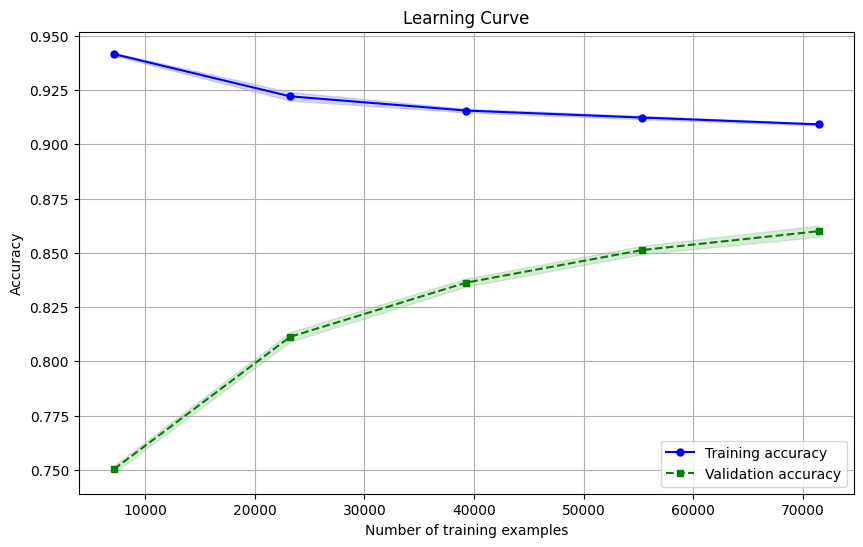

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

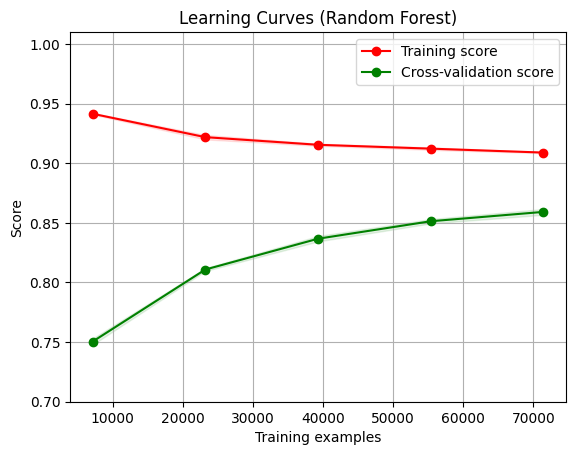

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(best_model, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()

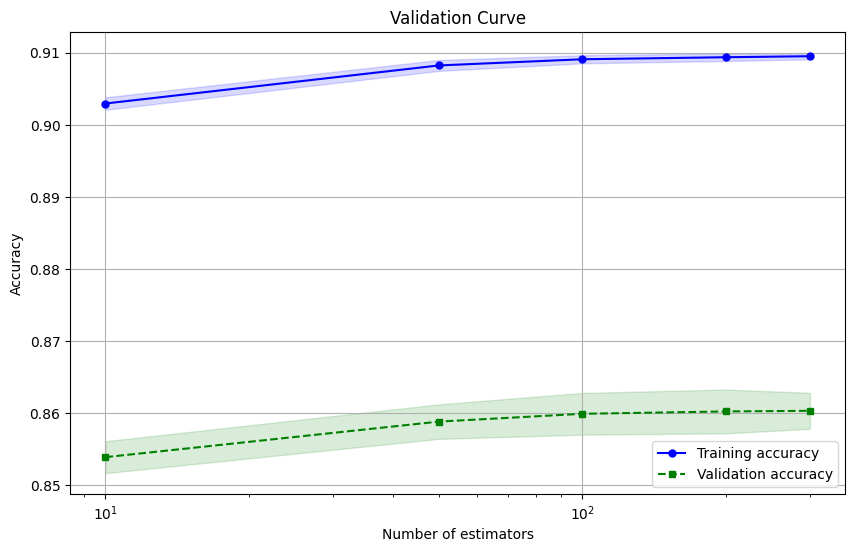

In [ ]:
param_range = [10, 50, 100, 200, 300]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(**best_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.show()

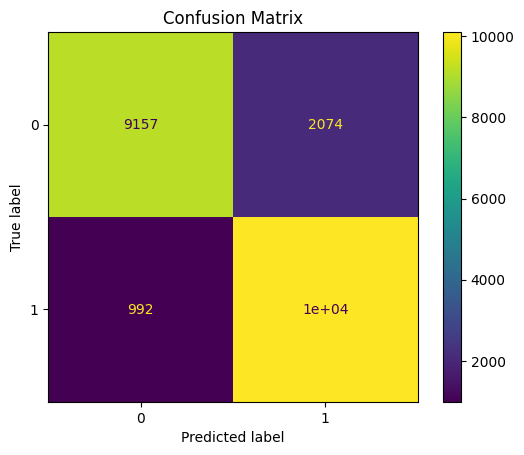

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

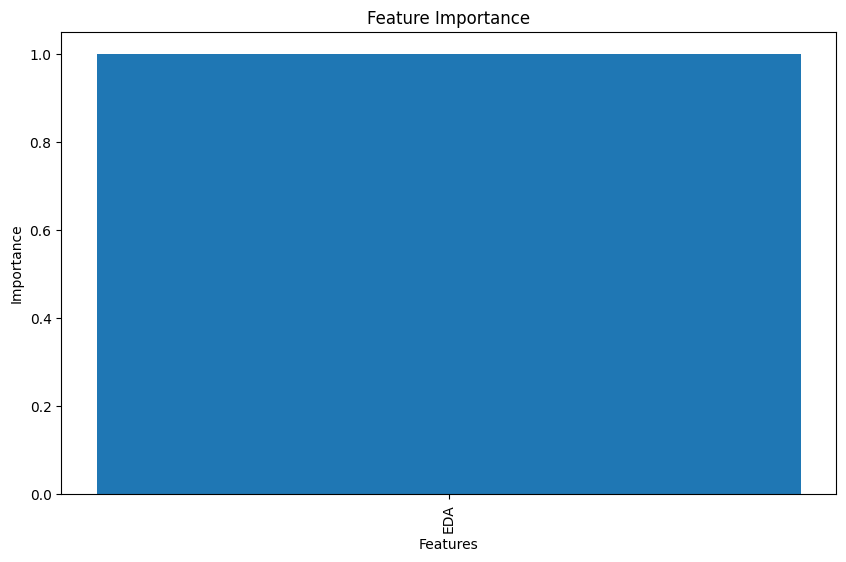

In [ ]:
# Feature Importance Plot
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), features[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

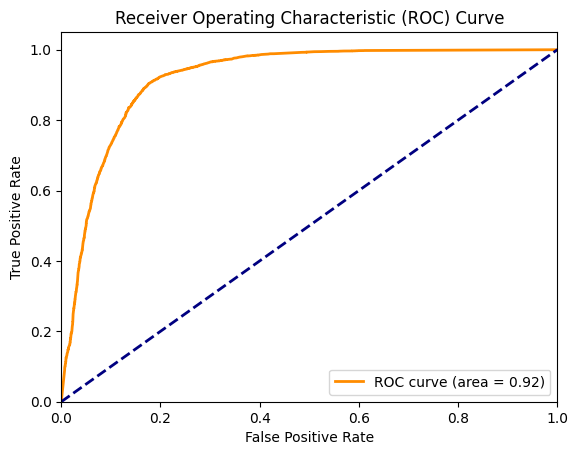

In [ ]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

FINAL

In [ ]:
import joblib
joblib.dump(best_model, 'Undersample_model_EDA.pkl')

['Undersample_model_EDA.pkl']

In [ ]:
loaded_model = joblib.load('Undersample_model_EDA.pkl')
new_data_predictions = loaded_model.predict(X_test)
predictions_df = pd.DataFrame(new_data_predictions, columns=['predictions'])
predictions_df

,predictions
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
22319,1.0
22320,0.0
22321,0.0
22322,1.0


In [ ]:
y_test

89473     1.0
81547     1.0
32809     0.0
62073     1.0
99018     1.0
         ... 
69328     1.0
26827     0.0
32094     0.0
56255     1.0
101153    1.0
Name: labels, Length: 22324, dtype: float64

In [ ]:
traget_df = y_test.reset_index(drop=True)

In [ ]:
aligned_df = pd.concat([predictions_df, traget_df], axis=1)

aligned_df

,predictions,labels
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
22319,1.0,1.0
22320,0.0,0.0
22321,0.0,0.0
22322,1.0,1.0


In [ ]:
same_values = (aligned_df['predictions'] == aligned_df['labels']).sum()
different_values = (aligned_df['predictions'] != aligned_df['labels']).sum()

print("Number of rows with the same values:", same_values)
print("Number of rows with different values:", different_values)

Number of rows with the same values: 19258
Number of rows with different values: 3066


In [ ]:
# Nové náhodné dáta
new_data = np.random.randint(0, 17, size=(100, 1))
new_data = pd.DataFrame(new_data, columns=['EDA'])
new_data

,EDA
0,9
1,12
2,13
3,10
4,14
...,...
95,5
96,2
97,8
98,15


In [ ]:
normalize_data(new_data)

,EDA
0,0.159174
1,0.756079
2,0.955047
3,0.358142
4,1.154015
...,...
95,-0.636698
96,-1.233602
97,-0.039794
98,1.352983


In [ ]:
loaded_model = joblib.load('Undersample_model_EDA.pkl')
new_data_predictions = loaded_model.predict(new_data)
predictions_df = pd.DataFrame(new_data_predictions, columns=['predictions'])
predictions_df

,predictions
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


In [ ]:
predictions_df.value_counts()

predictions
0.0            80
1.0            20
Name: count, dtype: int64

In [ ]:
concatenated_data = pd.concat([new_data, predictions_df], axis=1)
concatenated_data

,EDA,predictions
0,9,0.0
1,12,0.0
2,13,0.0
3,10,0.0
4,14,0.0
...,...,...
95,5,0.0
96,2,0.0
97,8,0.0
98,15,0.0
